In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
#import packages
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import re
import nltk
from sklearn.metrics import classification_report
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
import matplotlib.pyplot as plt

In [ ]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [ ]:
#load the training data
df_train = pd.read_csv("/content/gdrive/MyDrive/EDA/data/Corona_NLP_train.csv", encoding="latin_1")

In [ ]:
#show the first 10 entries
df_train.head(10)

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative
5,3804,48756,"ÃT: 36.319708,-82.363649",16-03-2020,As news of the regionÂs first confirmed COVID...,Positive
6,3805,48757,"35.926541,-78.753267",16-03-2020,Cashier at grocery store was sharing his insig...,Positive
7,3806,48758,Austria,16-03-2020,Was at the supermarket today. Didn't buy toile...,Neutral
8,3807,48759,"Atlanta, GA USA",16-03-2020,Due to COVID-19 our retail store and classroom...,Positive
9,3808,48760,"BHAVNAGAR,GUJRAT",16-03-2020,"For corona prevention,we should stop to buy th...",Negative


In [ ]:
#function to convert from 5 classes to just 3
def convert_Sentiment(sentiment):
    if sentiment == "Extremely Positive":
        return 2
    elif sentiment == "Extremely Negative":
        return 0
    elif sentiment == "Positive":
        return 2
    elif sentiment == "Negative":
        return 0
    else:
        return 1

In [ ]:
#apply the aforementioned function 
df_train.Sentiment = df_train.Sentiment.apply(lambda x : convert_Sentiment(x))

In [ ]:
stop_words_nltk = set(stopwords.words('english'))
stemmer = PorterStemmer() 

#function to process the tweets from their raw form
def preprocess(tweet):

  newTweet = tweet
  
  #remove all non-alphanumeric characters
  newTweet = re.sub('[^a-zA-Z]'," ",newTweet)
  #lower all characters
  newTweet = newTweet.lower()
  #split the tweets into separate words
  newTweet = newTweet.split()
  #stem each word using PorterStemmer
  newTweet = [stemmer.stem(word) for word in newTweet if word.lower() not in stop_words_nltk]
  #rejoin the separate words into one string
  newTweet = ' '.join(newTweet)

  return newTweet

In [ ]:
#retain the training data as the tweets and the labels as the sentiment
X = df_train['OriginalTweet']
y = df_train['Sentiment']

In [ ]:
#apply preprocessing to the training data
X_prep = []
for line in X:
  prep_line = preprocess(line)
  X_prep.append(prep_line)

In [ ]:
# split data into train and validation
X_train , X_val , y_train , y_val = train_test_split(X_prep,y,test_size=0.1,random_state=0)

In [ ]:
# Hyperparameter tuning
# here, we go through a multitude of parameter values to see which combination
# performs better
print('max_features  penalty  tol  C  Accuracy')

best_acc = 0
best_parameters = {}

for max_features in [3000, 5000]:

  #initiate the TfidfVectorizer
  tfidf = TfidfVectorizer(max_features=max_features)

  #convert the training and validation data to tf-idf indexes
  X_train_tfidf = tfidf.fit_transform(X_train).toarray()
  X_val_tfidf = tfidf.transform(X_val).toarray()

  for penalty in ['l2']:
    for tol in [ 0.1, 1]:
      for C in [ 0.1, 1]:

        log = LogisticRegression(penalty=penalty, tol=tol, C=C)

        log.fit(X_train_tfidf, y_train)
        y_pred_log = log.predict(X_val_tfidf)

        score = accuracy_score(y_pred_log, y_val)

        print('{}  {}  {}  {}  {}'.format(max_features, penalty, tol, C, accuracy_score(y_pred_log, y_val)))

        #save the parameters for the best score
        if score > best_acc:
          best_acc = score
          best_parameters["best_mx"] = max_features
          best_parameters["best_penalty"] = penalty
          best_parameters["best_tol"] = tol
          best_parameters["best_C"] = C

print(best_acc)
print(best_parameters)

max_features  penalty  tol  C  Accuracy
3000  l2  0.1  0.1  0.7257045675413022


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


3000  l2  0.1  1  0.793974732750243
3000  l2  1  0.1  0.7261904761904762


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


3000  l2  1  1  0.793974732750243
5000  l2  0.1  0.1  0.7247327502429544


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


5000  l2  0.1  1  0.7927599611273081
5000  l2  1  0.1  0.7249757045675413
5000  l2  1  1  0.7927599611273081
0.793974732750243
{'best_mx': 3000, 'best_penalty': 'l2', 'best_tol': 0.1, 'best_C': 1}


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [ ]:
#train the model with the best parameters found
tf_idf = TfidfVectorizer(max_features=best_parameters["best_mx"])

X_train_tfidf = tfidf.transform(X_train).toarray()

log = LogisticRegression(penalty=best_parameters["best_penalty"], tol=best_parameters["best_tol"], C=best_parameters["best_C"])

log.fit(X_train_tfidf, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression(C=1, tol=0.1)

In [ ]:
#load test data and process it

df_test = pd.read_csv("/content/gdrive/MyDrive/EDA/data/Corona_NLP_test.csv", encoding="latin_1")
df_test.Sentiment = df_test.Sentiment.apply(lambda x : convert_Sentiment(x))


In [ ]:
# retain the test data and test labels
X_test = df_test['OriginalTweet']
y_test = df_test['Sentiment']

In [ ]:
# preprocess the test values
X_test_prep = []
for line in X_test:
  prep_line = preprocess(line)
  X_test_prep.append(prep_line)

In [ ]:
# convert the test data to tf-idf vectors and predict the values
X_test_tfidf = tfidf.fit_transform(X_test_prep).toarray()

log_pred = log.predict(X_test_tfidf)

cr = classification_report(y_test, log_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.81      0.79      0.80      1633
           1       0.70      0.65      0.67       619
           2       0.79      0.83      0.81      1546

    accuracy                           0.79      3798
   macro avg       0.77      0.76      0.76      3798
weighted avg       0.78      0.79      0.78      3798



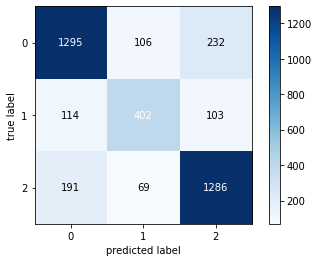

In [ ]:
#display the confusion matrix
cm = confusion_matrix(y_test, log_pred)

figure, ax = plot_confusion_matrix(conf_mat = cm,
                                   colorbar = True)
plt.show()